In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [7]:
advertising = pd.DataFrame(pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv"))
advertising.head()
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
advertising.shape

(200, 4)

In [10]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
advertising.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [17]:
sum = advertising.sum()*100/advertising.shape[0]
print(sum)

TV           14704.25
Radio         2326.40
Newspaper     3055.40
Sales         1513.05
dtype: float64


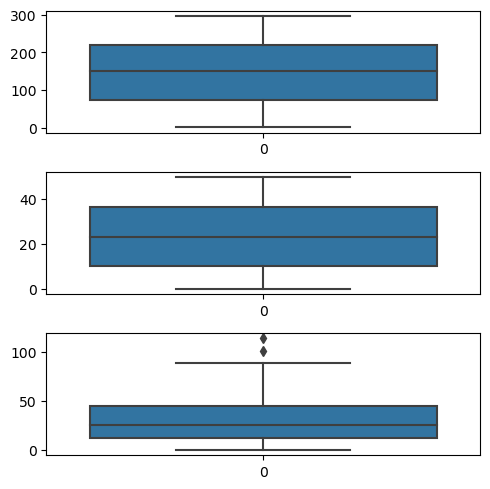

In [22]:
fig , axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'],ax= axs[0])
plt2 = sns.boxplot(advertising['Radio'],ax = axs[1])
plt3 = sns.boxplot(advertising['Newspaper'],ax = axs[2])
plt.tight_layout()

**Explortory Data Analysis**

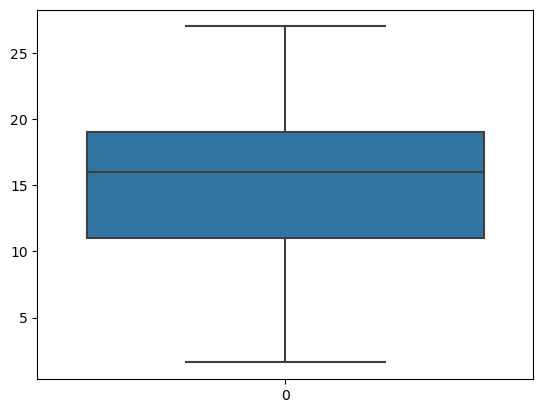

In [24]:
sns.boxplot(advertising['Sales'])
plt.show()

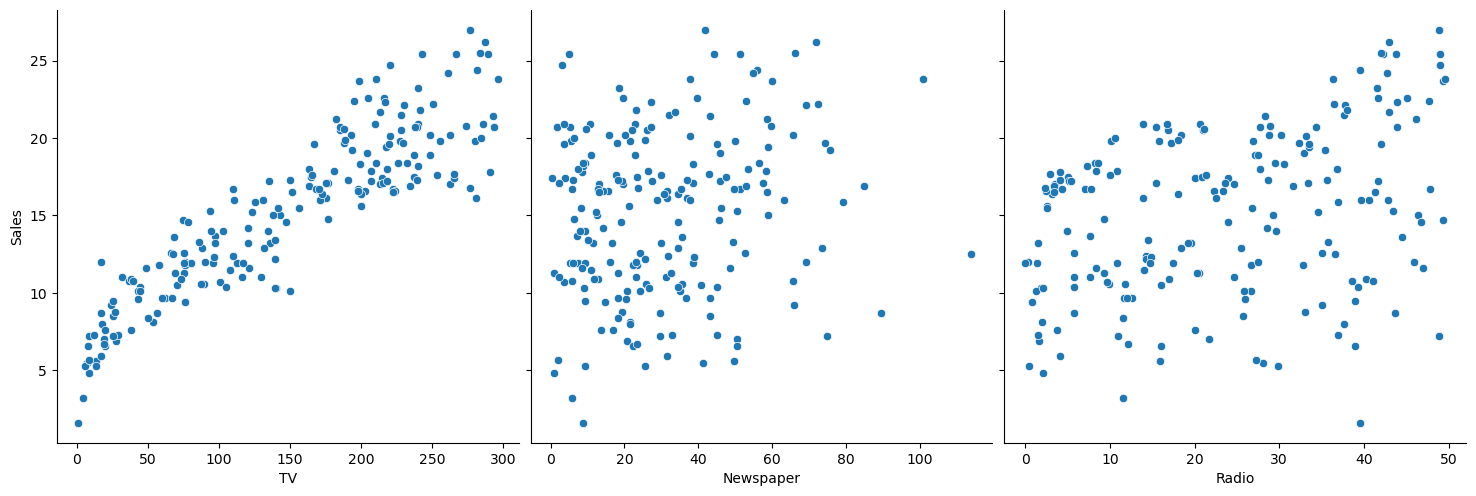

In [28]:
#lets see how sales are related with other variable using scatter plot 
sns.pairplot(advertising, x_vars =['TV','Newspaper','Radio',],y_vars ="Sales", height = 5 , kind = 'scatter' , aspect = 1)
plt.show()

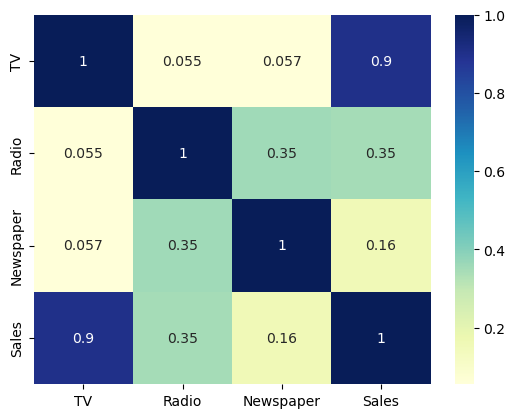

In [35]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()


In [36]:
X = advertising['TV']
y = advertising['Sales']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [39]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [40]:
import statsmodels.api as sm

In [41]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()


In [42]:
lr.params


const    6.948683
TV       0.054546
dtype: float64

In [43]:
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        06:59:05   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

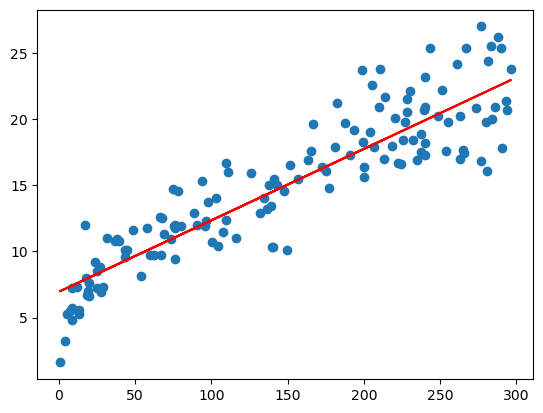

In [44]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Model Evaluation




Residual analysis
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [45]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

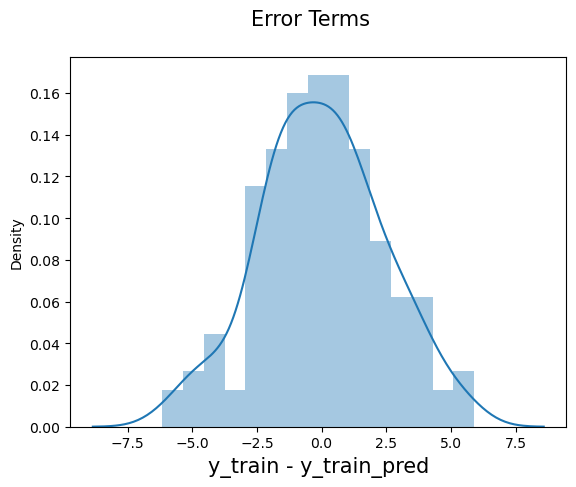

In [46]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

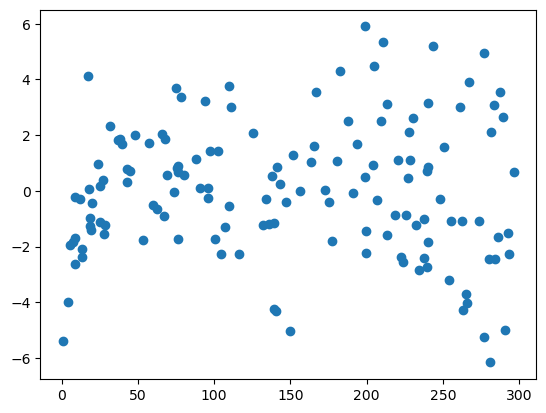

In [47]:
plt.scatter(X_train,res)
plt.show()

In [48]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [49]:
y_pred.head()


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [52]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

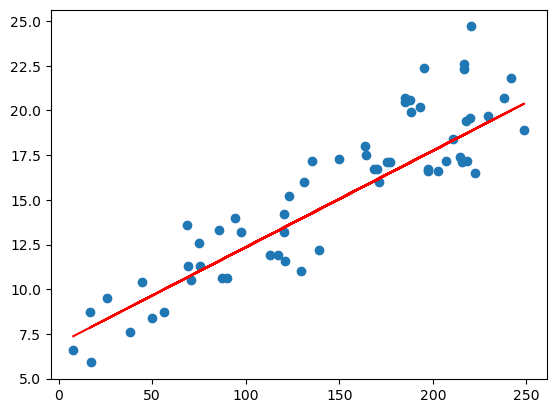

In [53]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()